# **Handwritten digits classification using neural network**






In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from tensorflow import keras

In [ ]:
(X_train, Y_train) , (X_test, Y_test) = keras.datasets.mnist.load_data()

In [ ]:
X_train.shape


(60000, 28, 28)

In [ ]:
Y_test.shape

(10000,)

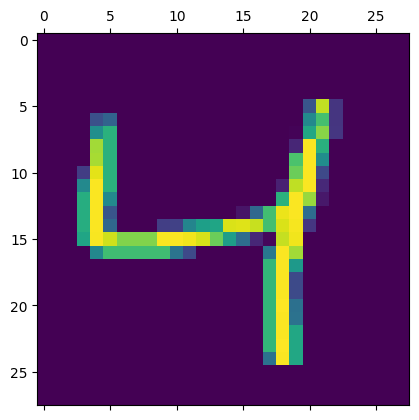

In [ ]:
plt.matshow(X_train[2])

In [ ]:
Y_train[2]

4

In [ ]:
X_train = X_train / 255
X_test = X_test / 255

In [ ]:
X_train_flattened = X_train.reshape(len(X_train),28*28)
X_test_flattened = X_test.reshape(len(X_test),28*28)
X_train_flattened.shape, X_test_flattened.shape

((60000, 784), (10000, 784))

Without Using Flatten Layer to create confusion matrix

In [ ]:
model = keras.Sequential([
    #keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, Y_train, epochs=5)



Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2645 - accuracy: 0.9263
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1179 - accuracy: 0.9657
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0835 - accuracy: 0.9752
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0643 - accuracy: 0.9800
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0516 - accuracy: 0.9844


In [ ]:
model.evaluate(X_test_flattened,Y_test)


313/313 [==============================] - 1s 2ms/step - loss: 0.0792 - accuracy: 0.9758


[0.07923591136932373, 0.9757999777793884]

313/313 [==============================] - 1s 2ms/step


Text(95.72222222222221, 0.5, 'Truth')

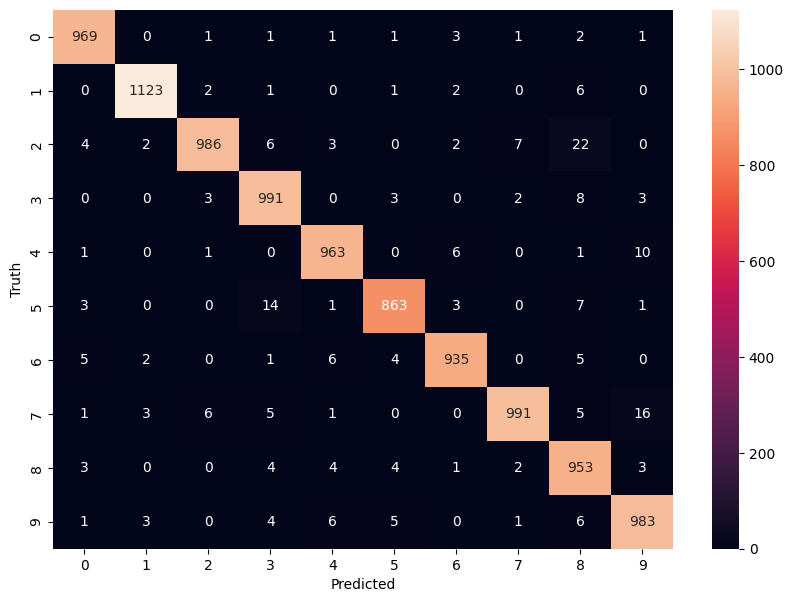

In [ ]:
y_predicted = model.predict(X_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=Y_test,predictions=y_predicted_labels)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

By using flatten layer so that we don't have to call .reshape on input dataset

In [ ]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, Y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2828 - accuracy: 0.9205
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1270 - accuracy: 0.9631
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0886 - accuracy: 0.9739
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0668 - accuracy: 0.9797
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0518 - accuracy: 0.9844
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0416 - accuracy: 0.9874
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0342 - accuracy: 0.9892
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0282 - accuracy: 0.9917
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0232 - accuracy: 0.9924
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.020

In [ ]:
model.evaluate(X_test,Y_test)

313/313 [==============================] - 1s 2ms/step - loss: 2.5170 - accuracy: 0.0892


[2.516967296600342, 0.08919999748468399]